In [6]:
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:001.3 MB/s eta 0:00:01


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load spreadsheet
xl = pd.ExcelFile('assessment.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Data')
df.head()

C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
2  1913     69  A-Levels                    NaN  10155.0       3.0   
3  2032     70       NaN                    NaN  21863.0       2.0   
4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   

        gn_occ  NUM_PRD  CASATD_CNT   MTHCASA  ...     MAXUT  N_FUNDS  \
0         PMEB        3         8.0   6896.91  ...       NaN      NaN   
1         PMEB        4        13.0  51714.78  ...       NaN      NaN   
2         PMEB        4         1.0   5420.09  ...  59600.88      1.0   
3      RETIREE        3         1.0  13596.65  ...  33902.58      1.0   
4  BLUE COLLAR        4         2.0  51639.18  ...  15619.29      1.0   

       CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  \
0   13.233333              NaN              NaN          NaN          NaN   
1  727.629167          8530.88           273.44  2296.713333     27560.56   
2  367.389167           523.35           122.13   283.580833      3402.97   
3         NaN              NaN              NaN          NaN          NaN   
4         NaN              NaN              NaN          NaN          NaN   

   ANN_N_TRX   CC_LMT     C_seg  
0        NaN  34500.0  AFFLUENT  
1       88.0   4000.0  AFFLUENT  
2       78.0   5000.0  AFFLUENT  
3        NaN      0.0  AFFLUENT  
4        NaN      0.0  AFFLUENT  

[5 rows x 30 columns]

In [5]:
#  Define function to calculate total distinct products held
def calculate_total_distinct_products(row):
    if row['CASATD_CNT'] == 1:
        return max(row['NUM_PRD'] - 1, 0)
    elif row['CASATD_CNT'] == 2:
        return max(row['NUM_PRD'] - 2, 0)
    else:
        return max(row['NUM_PRD'] - 2, 0)

df['Other_Products_Count'] = df.apply(calculate_total_distinct_products, axis=1)

# Display the result
df[['C_ID', 'CASATD_CNT', 'NUM_PRD', 'Other_Products_Count']]

C_ID  CASATD_CNT  NUM_PRD  Other_Products_Count
0       1443         8.0        3                     1
1       1559        13.0        4                     2
2       1913         1.0        4                     3
3       2032         1.0        3                     2
4       2048         2.0        4                     2
...      ...         ...      ...                   ...
66078  22522         NaN        1                     0
66079  22549         NaN        1                     0
66080  22576         NaN        1                     0
66081  22577         NaN        1                     0
66082  22584         1.0        2                     1

[66083 rows x 4 columns]

In [10]:
# create column name CASASTD_CNT_UNQ based on if NUM_PRD=1 and CASATD_CNT=1 then CASASTD_CNT_UNQ=1 , if NUM_PRD=2 and CASATD_CNT=2 then CASASTD_CNT_UNQ=2, if NUM_PRD>2 and CASATD_CNT>2 then CASASTD_CNT_UNQ=2
def calculate_casastd_cnt_unq(row):
    if row['CASATD_CNT'] == 1:
        return 1
    elif row['CASATD_CNT'] == 2:
        return 2
    else:
        return 2

df['CASASTD_CNT_UNQ'] = df.apply(calculate_casastd_cnt_unq, axis=1)
df[['C_ID', 'CASATD_CNT', 'NUM_PRD', 'CASASTD_CNT_UNQ']].head()

C_ID  CASATD_CNT  NUM_PRD  CASASTD_CNT_UNQ
0  1443         8.0        3                2
1  1559        13.0        4                2
2  1913         1.0        4                1
3  2032         1.0        3                1
4  2048         2.0        4                2

In [12]:
# if MAXTD or MTHTD have some value create new column with name IS_TD with value 1 else 0
df['IS_TD'] = np.where((df['MAXTD'].notnull() | df['MTHTD'].notnull()), 1, 0)
df[['C_ID', 'CASATD_CNT', 'NUM_PRD','MTHTD','MAXTD' ,'IS_TD']].head()

C_ID  CASATD_CNT  NUM_PRD      MTHTD      MAXTD  IS_TD
0  1443         8.0        3  105000.00   25000.00      1
1  1559        13.0        4  575571.97  135026.15      1
2  1913         1.0        4        NaN        NaN      0
3  2032         1.0        3        NaN        NaN      0
4  2048         2.0        4        NaN        NaN      0

In [13]:
# This checks if monthly for CASA if there is some value , and if record exist with Min or max value where for last 1 year it's null
# Count of records where MTHCASA is null and either MAXCASA or MINCASA is not null
count = df[(df['MTHCASA'].isnull()) & ((df['MAXCASA'].notnull()) | (df['MINCASA'].notnull()))].shape[0]
print(f'Count of records where MTHCASA is Null and either MAXCASA or MINCASA have some value: {count}')


Count of records where MTHCASA is Null and either MAXCASA or MINCASA have some value: 0


In [14]:
# if MTHCASA or MAXCASA have some value create new column with name IS_CASA with value 1 else 0
df['IS_CASA'] = np.where((df['MTHCASA'].notnull() | df['MAXCASA'].notnull()), 1, 0)
df[['C_ID', 'CASATD_CNT', 'NUM_PRD','MTHCASA','MAXCASA' ,'IS_CASA']].head()

C_ID  CASATD_CNT  NUM_PRD   MTHCASA   MAXCASA  IS_CASA
0  1443         8.0        3   6896.91   4899.08        1
1  1559        13.0        4  51714.78  35740.55        1
2  1913         1.0        4   5420.09   5420.09        1
3  2032         1.0        3  13596.65  13596.65        1
4  2048         2.0        4  51639.18  32689.93        1

In [20]:
# verify if anywhere AL_tag also have pur_price_avg not null
count = df[(df['AL_tag'].isnull()) & (df['pur_price_avg'].notnull())].shape[0]
print(f'Count of records where AL_tag is not null and pur_price_avg is not null: {count}')


Count of records where AL_tag is not null and pur_price_avg is not null: 0


In [24]:
# check if N_FUNDS is null then MAXUT or UT_AVE are also null
count = df[(df['N_FUNDS'].isnull()) & ((df['MAXUT'].notnull()) | (df['UT_AVE'].notnull()))].shape[0]
print(f'Count of records where N_FUNDS is Null and either MAXUT or UT_AVE have some value: {count}')

count = df[(df['N_FUNDS'].notnull()) & ((df['MAXUT'].isnull()) | (df['UT_AVE'].isnull()))].shape[0]
print(f'Count of records where N_FUNDS is not Null and either MAXUT or UT_AVE is null: {count}')


Count of records where N_FUNDS is Null and either MAXUT or UT_AVE have some value: 0
Count of records where N_FUNDS is not Null and either MAXUT or UT_AVE is null: 0


In [23]:
# if N_FUNDS or MAXUT have some count then create new column with name IS_FUNDS with value 1 else 0
df['IS_FUNDS'] = np.where((df['N_FUNDS'].notnull() | df['MAXUT'].notnull()), 1, 0)
df[['C_ID','NUM_PRD','UT_AVE','N_FUNDS','MAXUT' ,'IS_FUNDS']].head()

C_ID  NUM_PRD        UT_AVE  N_FUNDS     MAXUT  IS_FUNDS
0  1443        3           NaN      NaN       NaN         0
1  1559        4           NaN      NaN       NaN         0
2  1913        4  58424.550000      1.0  59600.88         1
3  2032        3  28863.181667      1.0  33902.58         1
4  2048        4  15060.339167      1.0  15619.29         1

In [35]:
# Check if CC_AVE is null and sum of columns MAX_MTH_TRN_AMT, MIN_MTH_TRN_AMT, AVG_TRN_AMT, ANN_TRN_AMT, ANN_N_TRX, CC_LMT is not null
count = df[(df['CC_AVE'].isnull()| df['CC_AVE']==0) & (df['MAX_MTH_TRN_AMT'] + df['MIN_MTH_TRN_AMT']+ df['AVG_TRN_AMT']+ df['ANN_TRN_AMT']+ df['ANN_N_TRX']+ df['CC_LMT']) > 0].shape[0]
print(f'Count of records where CC_AVE is Null and either MAX_MTH_TRN_AMT, MIN_MTH_TRN_AMT, AVG_TRN_AMT, ANN_TRN_AMT, ANN_N_TRX, CC_LMT or C_seg have some value: {count}')


Count of records where CC_AVE is Null and either MAX_MTH_TRN_AMT, MIN_MTH_TRN_AMT, AVG_TRN_AMT, ANN_TRN_AMT, ANN_N_TRX, CC_LMT or C_seg have some value: 302


In [39]:
# IF CC_CHECK is 1 it means these records customer who don't have any outstanding balancec every month, so regular payee
# create new column named CC_CHECK with value 1 if above line return positive result else 0
df['CC_CHECK'] = np.where(((df['CC_AVE'].isnull()| df['CC_AVE']==0) & (df['MAX_MTH_TRN_AMT'] + df['MIN_MTH_TRN_AMT']+ df['AVG_TRN_AMT']+ df['ANN_TRN_AMT']+ df['ANN_N_TRX']+ df['CC_LMT']) > 0), 1, 0)
df[(df['CC_AVE'].isnull()| df['CC_AVE']==0) & (df['MAX_MTH_TRN_AMT'] + df['MIN_MTH_TRN_AMT']+ df['AVG_TRN_AMT']+ df['ANN_TRN_AMT']+ df['ANN_N_TRX']+ df['CC_LMT']) > 0][['CC_AVE','MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT','CC_CHECK']].head()


CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  \
116      0.0            62.05            62.05     5.170833        62.05   
667      0.0          3446.00            58.59   559.033333      6708.40   
682      0.0           274.44            42.50    31.720000       380.64   
764      0.0            94.99            94.91    87.007500      1044.09   
1092     0.0           124.10            76.23    16.694167       200.33   

      ANN_N_TRX   CC_LMT  CC_CHECK  
116         1.0  11500.0         1  
667        51.0  10000.0         1  
682         5.0   8000.0         1  
764        11.0   4000.0         1  
1092        2.0   3000.0         1

In [58]:
# create new df_clean where CC_CHECK is 0
df_clean = df[df['CC_CHECK'] == 0].copy()
df_clean.head()

C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
2  1913     69  A-Levels                    NaN  10155.0       3.0   
3  2032     70       NaN                    NaN  21863.0       2.0   
4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   

        gn_occ  NUM_PRD  CASATD_CNT   MTHCASA  ...  ANN_N_TRX   CC_LMT  \
0         PMEB        3         8.0   6896.91  ...        NaN  34500.0   
1         PMEB        4        13.0  51714.78  ...       88.0   4000.0   
2         PMEB        4         1.0   5420.09  ...       78.0   5000.0   
3      RETIREE        3         1.0  13596.65  ...        NaN      0.0   
4  BLUE COLLAR        4         2.0  51639.18  ...        NaN      0.0   

      C_seg  Total_Distinct_Products  Other_Products_Count  CASASTD_CNT_UNQ  \
0  AFFLUENT                        1                     1                2   
1  AFFLUENT                        2                     2                2   
2  AFFLUENT                        3                     3                1   
3  AFFLUENT                        2                     2                1   
4  AFFLUENT                        2                     2                2   

   IS_TD  IS_CASA  IS_FUNDS  CC_CHECK  
0      1        1         0         0  
1      1        1         0         0  
2      0        1         1         0  
3      0        1         1         0  
4      0        1         1         0  

[5 rows x 37 columns]

In [77]:
# change NaN to 0 for these columns 'CC_AVE','MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT'
df[['CC_AVE','MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT']] = df[['CC_AVE','MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT']].fillna(0)

# if sum of above columns is 0 or NULL then create new column with name IS_CC_ZERO with value o else 1
df['IS_CC'] = np.where(((df['CC_AVE'] + df['MAX_MTH_TRN_AMT'] + df['MIN_MTH_TRN_AMT'] + df['AVG_TRN_AMT'] + df['ANN_TRN_AMT'] + df['ANN_N_TRX'] + df['CC_LMT']).isnull() | (df['CC_AVE'] + df['MAX_MTH_TRN_AMT'] + df['MIN_MTH_TRN_AMT'] + df['AVG_TRN_AMT'] + df['ANN_TRN_AMT'] + df['ANN_N_TRX'] + df['CC_LMT'])==0), 0, 1)
df[['C_ID', 'CC_AVE', 'MAX_MTH_TRN_AMT', 'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT', 'IS_CC', 'CC_CHECK']].head()


C_ID      CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  \
0  1443   13.233333             0.00             0.00     0.000000   
1  1559  727.629167          8530.88           273.44  2296.713333   
2  1913  367.389167           523.35           122.13   283.580833   
3  2032    0.000000             0.00             0.00     0.000000   
4  2048    0.000000             0.00             0.00     0.000000   

   ANN_TRN_AMT  ANN_N_TRX   CC_LMT  IS_CC  CC_CHECK  
0         0.00        0.0  34500.0      1         0  
1     27560.56       88.0   4000.0      1         0  
2      3402.97       78.0   5000.0      1         0  
3         0.00        0.0      0.0      0         0  
4         0.00        0.0      0.0      0         0

In [5]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
               C_ID         C_AGE            PC      INCM_TYP       NUM_PRD  \
count  66083.000000  66083.000000  65597.000000  36617.000000  66083.000000   
mean   41321.249111     52.357429  43249.703264      3.791709      2.097983   
std    27485.202813     14.323447  25671.057340      1.717852      1.093081   
min        0.000000      2.000000      0.000000      1.000000      1.000000   
25%    17402.000000     42.000000  21636.000000      2.000000      1.000000   
50%    37643.000000     52.000000  41101.000000      4.000000      2.000000   
75%    62866.500000     63.000000  60776.000000      5.000000      3.000000   
max    99996.000000    122.000000  99953.000000      8.000000      9.000000   

         CASATD_CNT       MTHCASA       MAXCASA       MINCASA         DRvCR  \
count  40991.000000  3.904500e+04  3.904500e+04  3.904500e+04  2.970800e+04   
mean       1.727867  1.614598e+04  1.544520e+04  1.317587e+04  3.663201e+04   
std        1.411307  6.683559e+


Data Exploration:


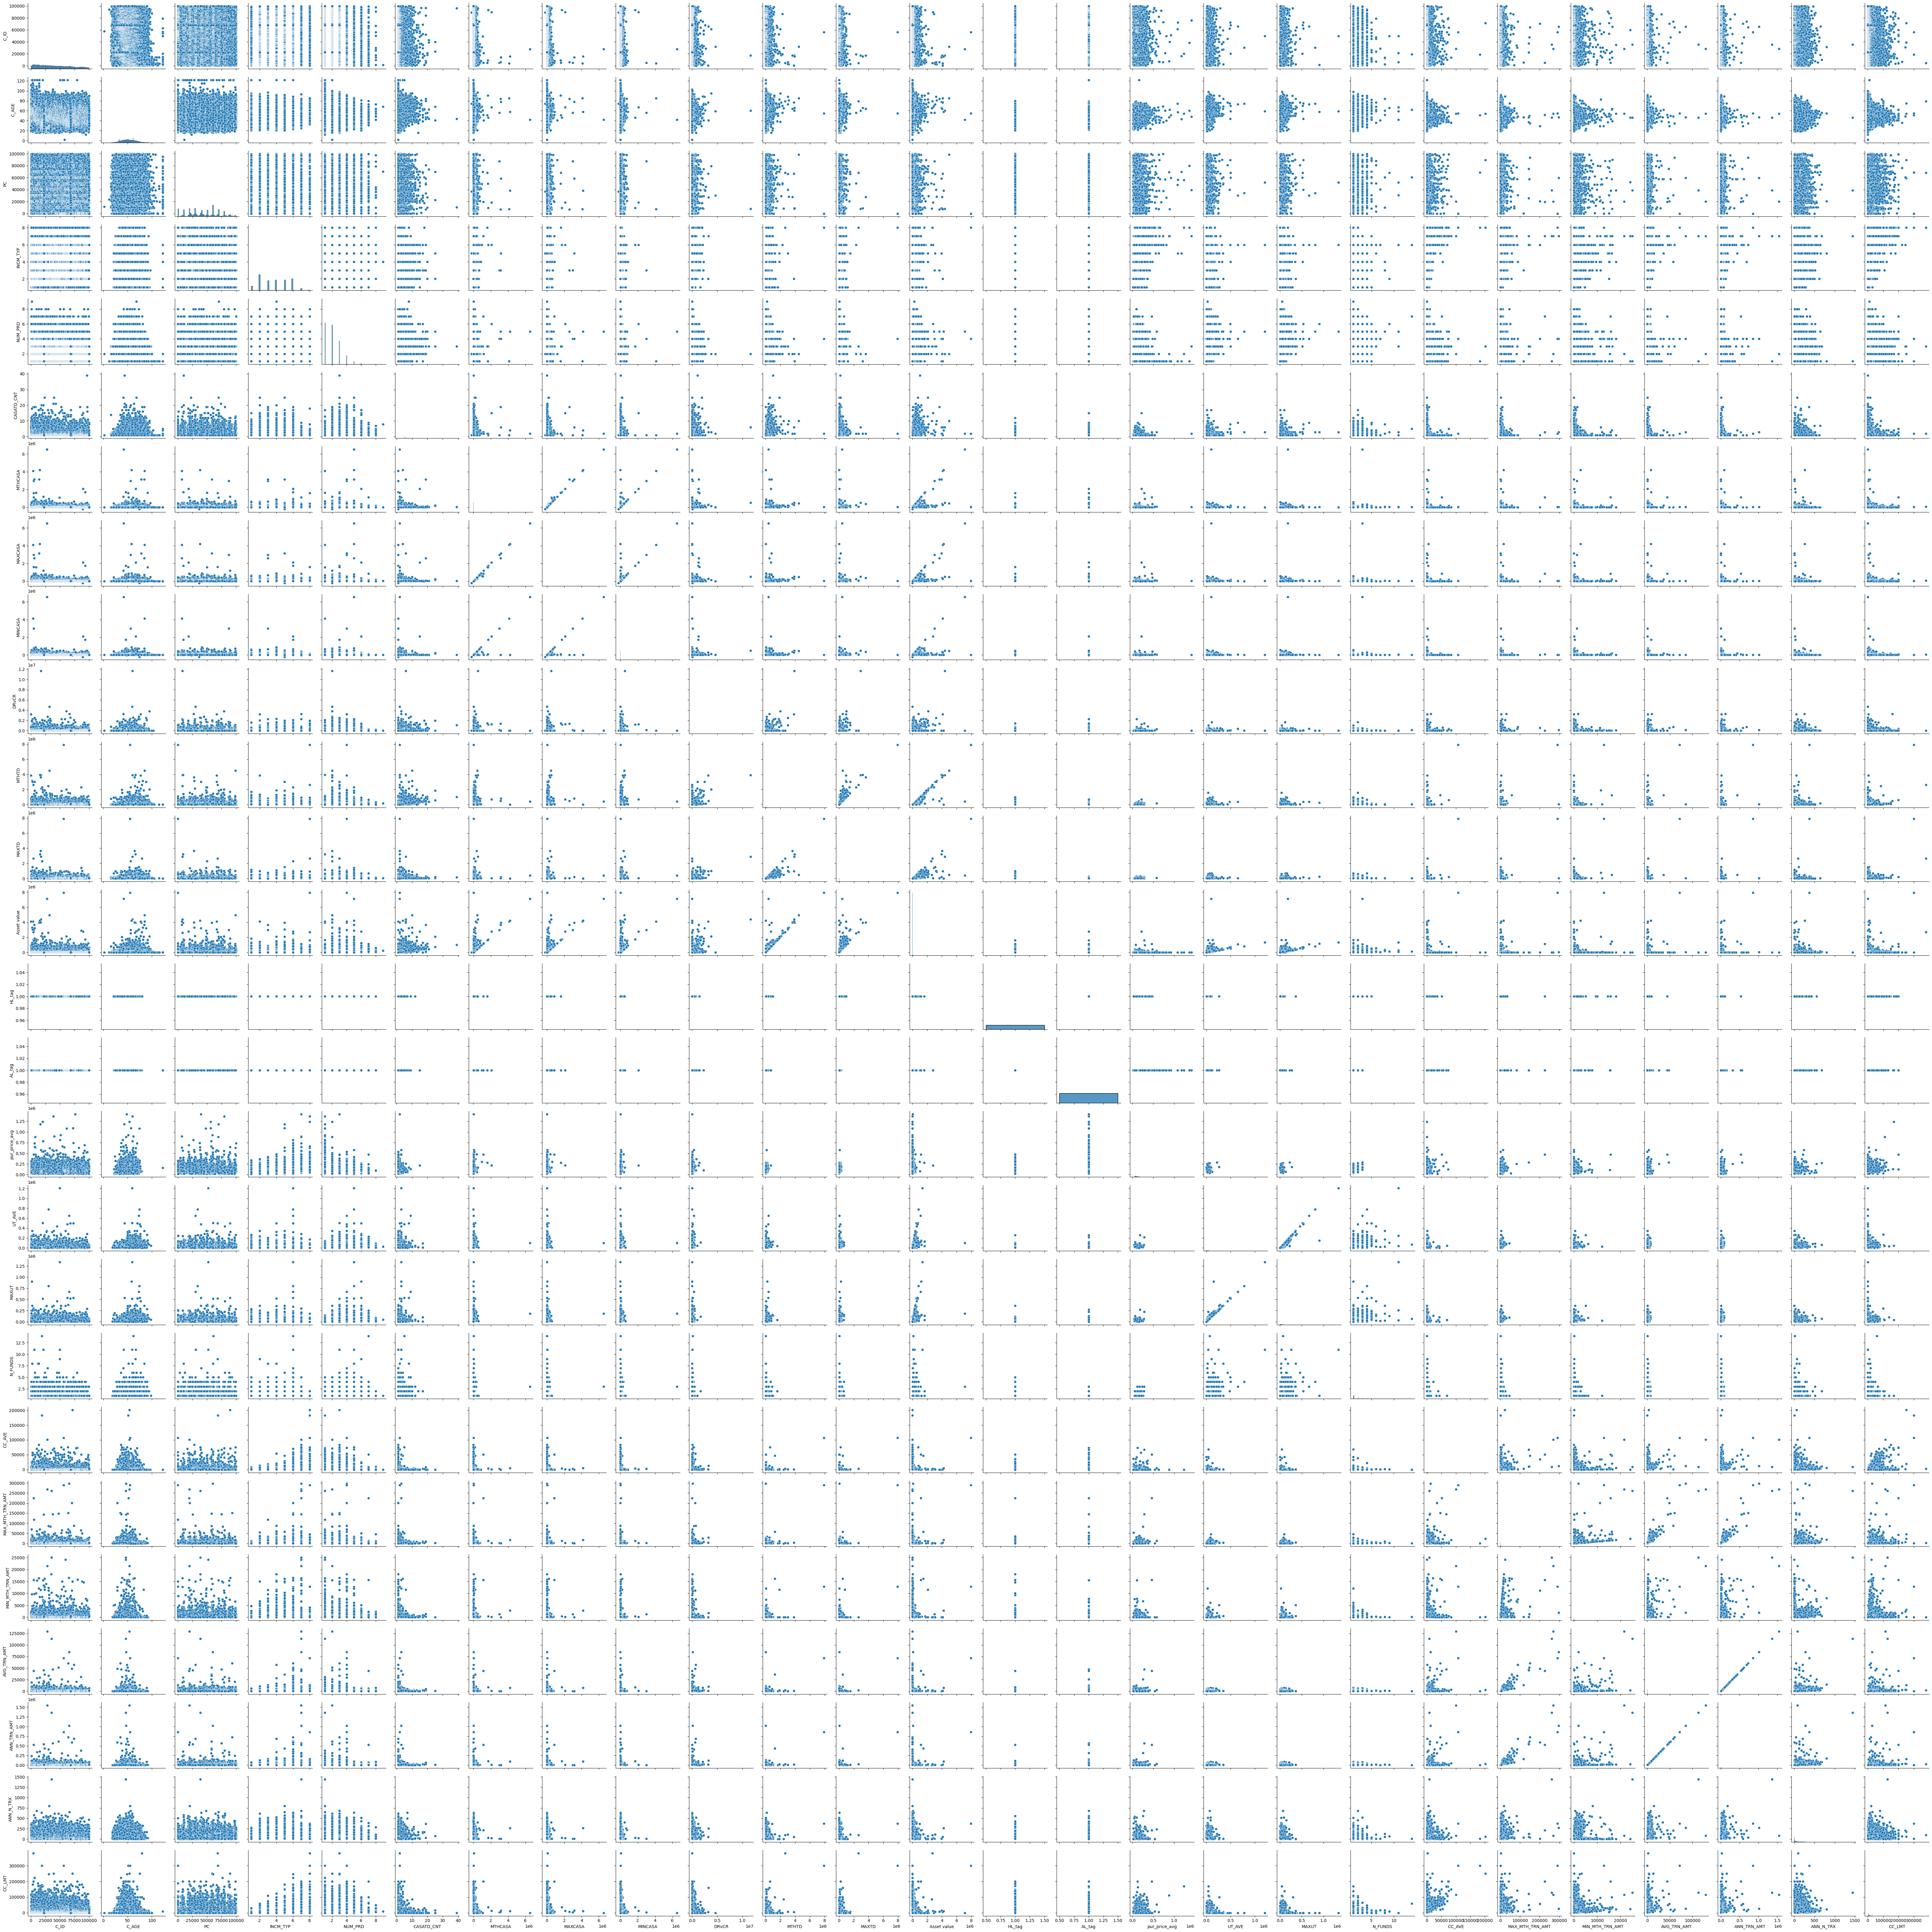

In [8]:
# Data Exploration
print("\nData Exploration:")
# Visualize distributions of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df[numerical_features])
plt.show()

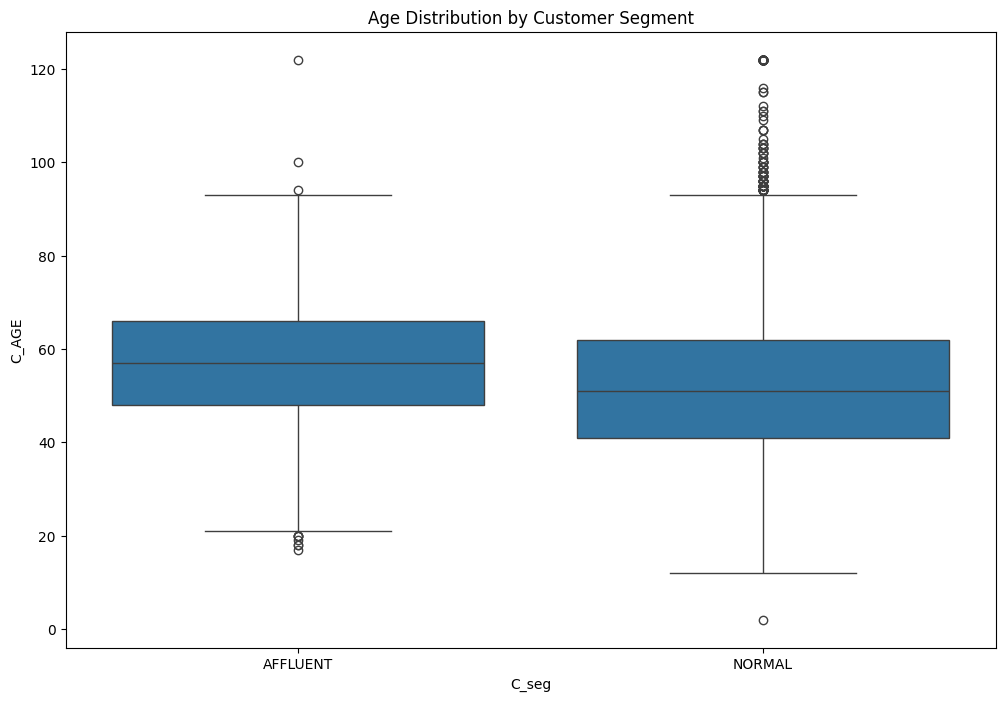

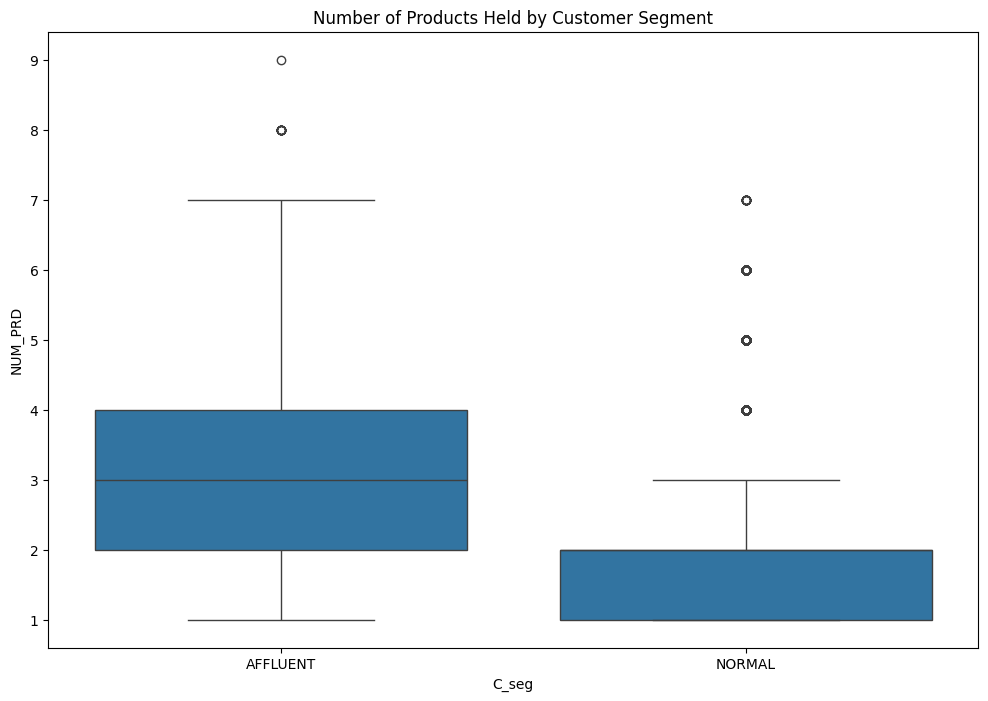

In [9]:
# Explore relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x="C_seg", y="C_AGE", data=df)
plt.title("Age Distribution by Customer Segment")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x="C_seg", y="NUM_PRD", data=df)
plt.title("Number of Products Held by Customer Segment")
plt.show()

In [15]:
# Customer Segmentation Analysis
print("\nCustomer Segmentation Analysis:")
segment_distribution = df["C_seg"].value_counts(normalize=True)
print("Customer Segment Distribution:")
print(segment_distribution)

class_distribution = df["C_seg"].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Customer Segmentation Analysis:
Customer Segment Distribution:
C_seg
NORMAL      0.834662
AFFLUENT    0.165338
Name: proportion, dtype: float64

Class Distribution:
C_seg
NORMAL      55157
AFFLUENT    10926
Name: count, dtype: int64


In [44]:
# count for each C_SEG category based on CC_CHECK
cc_check_distribution = df.groupby("C_seg")["CC_CHECK"].value_counts()
print("\nCC_CHECK Distribution by Customer Segment:",cc_check_distribution)



CC_CHECK Distribution by Customer Segment: C_seg     CC_CHECK
AFFLUENT  0           10866
          1              60
NORMAL    0           54915
          1             242
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Univariate and Bivariate Analysis:


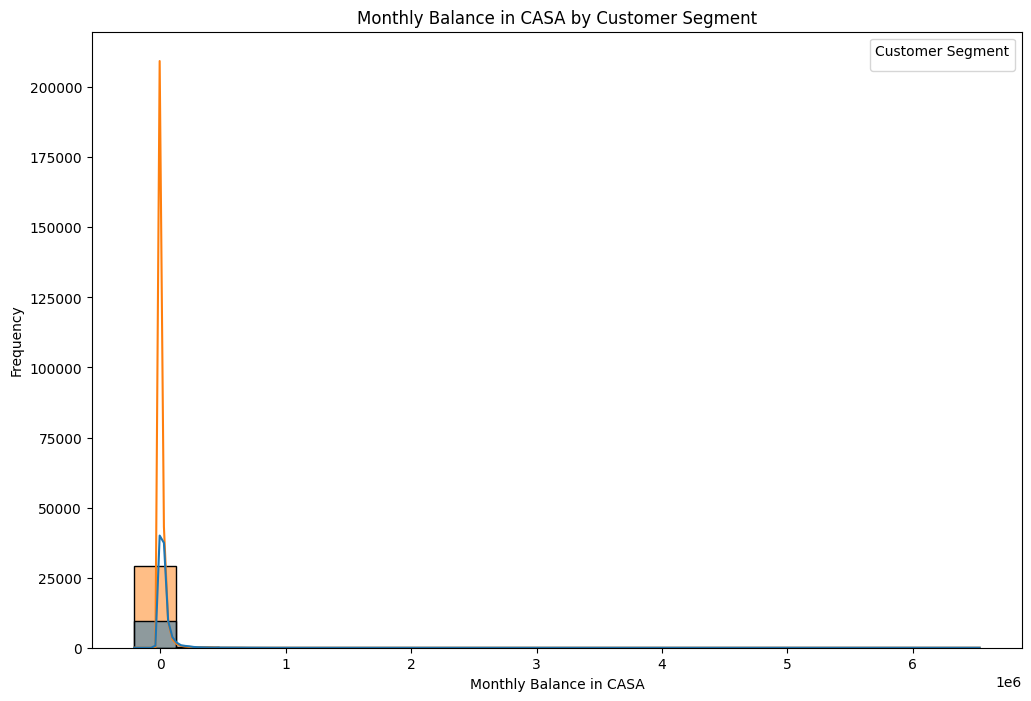

In [11]:
# Univariate and Bivariate Analysis
print("\nUnivariate and Bivariate Analysis:")
# Example: Distribution of CASA balance by customer segment
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="MTHCASA", hue="C_seg", bins=20, kde=True)
plt.title("Monthly Balance in CASA by Customer Segment")
plt.xlabel("Monthly Balance in CASA")
plt.ylabel("Frequency")
plt.legend(title="Customer Segment")
plt.show()


Outlier Detection:


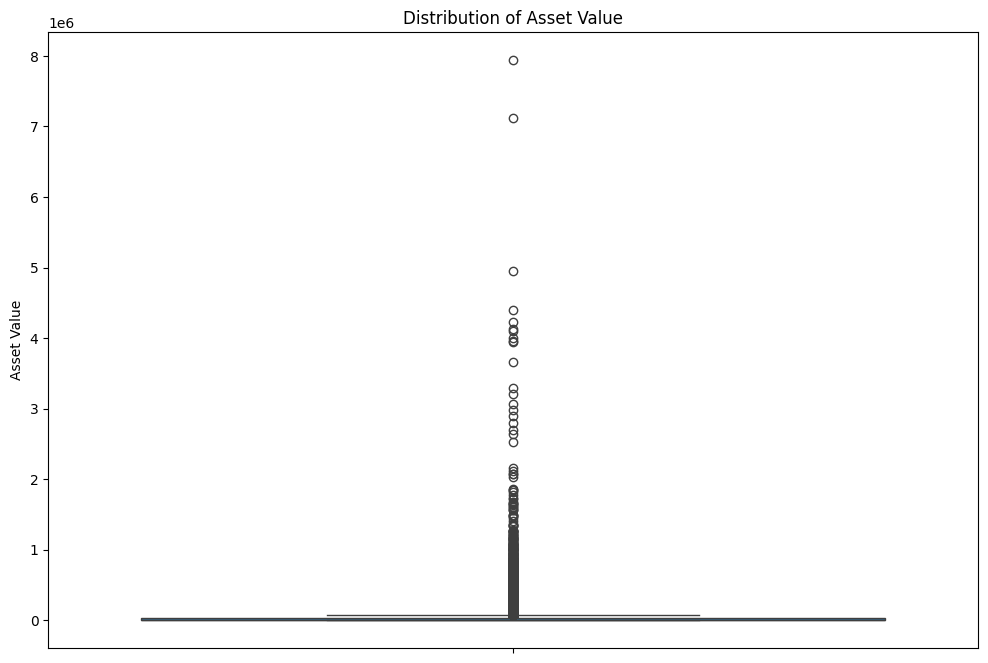

In [12]:
# Outlier Detection
print("\nOutlier Detection:")
# Example: Identify outliers in Asset value
plt.figure(figsize=(12, 8))
sns.boxplot(y="Asset value", data=df)
plt.title("Distribution of Asset Value")
plt.ylabel("Asset Value")
plt.show()


Correlation Analysis:


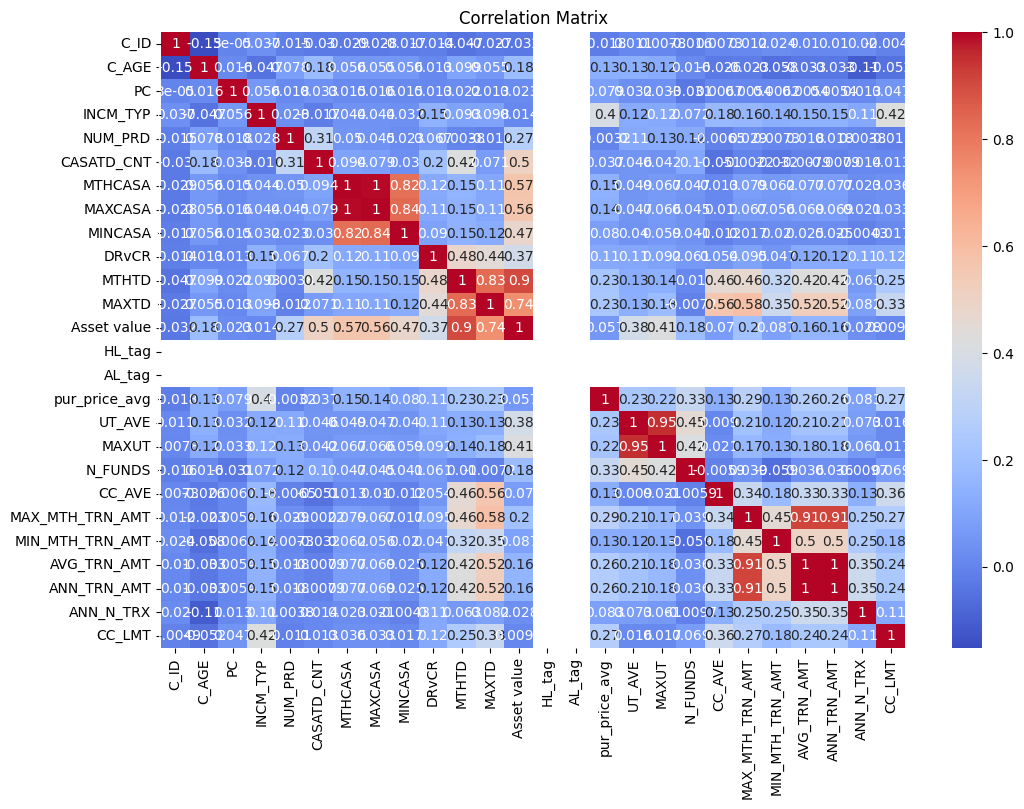

In [18]:
# Correlation Analysis
print("\nCorrelation Analysis:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
from data_prep import data_processing

filename = 'assessment.xlsx'
sheetname = 'Data'
df = data_processing(filename,sheetname)

/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
pd.set_option('display.max_columns', None)
df

C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
0       1443      1        1         1      1        0          4   
1       1559      1        1         1      1        0          4   
2       1913      1        1         1      1        0          4   
3       2032      1        1         1      0        0          4   
4       2048      1        1         1      0        0          4   
...      ...    ...      ...       ...    ...      ...        ...   
66078  22522      1        1         1      0        0          2   
66079  22549      1        1         1      0        1          2   
66080  22576      1        1         1      0        1          3   
66081  22577      1        1         1      1        0          2   
66082  22584      1        1         1      0        0          2   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
0                  3              2              2            0.494674   
1                  0              2              2            0.768132   
2                  0              0              2            0.240920   
3                  0              0              1            0.341494   
4                  0              2              1            0.563253   
...              ...            ...            ...                 ...   
66078              0              0              1           -0.699457   
66079              0              0              2           -0.699457   
66080              0              0              2           -0.699457   
66081              3              4              2           -0.699457   
66082              0              0              0            0.094250   

       Total_TD_Balance  Avg_CC_Transaction_Size  \
0             12.660331                 0.000000   
1             14.649413                 5.749972   
2              0.000000                 3.798079   
3              0.000000                 0.000000   
4              0.000000                 0.000000   
...                 ...                      ...   
66078          0.000000                 0.000000   
66079          0.000000                 0.000000   
66080          0.000000                 0.000000   
66081          0.000000                 6.146988   
66082          0.000000                 0.000000   

       CC_Outstanding_to_Credit_Limit_Ratio  Assets_to_Product_Ratio  \
0                                  0.039221                 0.457539   
1                                  2.953347                 0.610026   
2                                  2.121063                 0.367943   
3                                  0.000000                 0.347765   
4                                  0.000000                 0.372948   
...                                     ...                      ...   
66078                              0.000000                -0.660178   
66079                              0.000000                -0.660178   
66080                              0.000000                -0.660178   
66081                              1.223775                -0.660178   
66082                              0.000000                 0.036839   

       CASATD_Asset_Ratio  UT_Asset_Ratio  CC_Asset_Ratio  \
0            2.169925e+00        0.000000        0.000000   
1            2.807353e+00        0.000000        0.039221   
2           -8.830032e-01        0.647409        0.048790   
3           -5.759629e-01        0.545428        0.000000   
4            3.422985e-01        0.202054        0.000000   
...                   ...             ...             ...   
66078       -1.000000e+00        0.000000        0.000000   
66079       -1.000000e+00        0.000000        0.000000   
66080       -1.000000e+00        0.000000        0.000000   
66081       -1.000000e+00        0.000000       31.735646   
66082        7.624155e-14        0.000000        0.000000   

       Loan_to_Asset_Ratio  NUM_PRD  C_seg  
0                 0.00

In [ ]:
['C_ID', 'IS_TD', 'IS_CASA', 'IS_FUNDS', 'IS_CC', 'IS_LOAN', 'Age_Group',
       'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'Total_CASA_Balance',
       'Total_TD_Balance', 'Avg_CC_Transaction_Size',
       'CC_Outstanding_to_Credit_Limit_Ratio', 'Assets_to_Product_Ratio',
       'CASATD_Asset_Ratio', 'UT_Asset_Ratio', 'CC_Asset_Ratio',
       'Loan_to_Asset_Ratio', 'NUM_PRD', 'C_seg']

'C_ID': Customer Identifier
'IS_TD': Indicator if the customer has a Time Deposit
'IS_CASA': Indicator if the customer has a Current Account and Savings Account
'IS_FUNDS': Indicator if the customer has Funds
'IS_CC': Indicator if the customer has a Credit Card
'IS_LOAN': Indicator if the customer has a Loan
'Age_Group': Age group of the customer
'C_EDU_Encoded': Encoded Education level of the customer
'C_HSE_Encoded': Encoded Housing status of the customer
'C_OCC_Encoded': Encoded Occupation of the customer
'Total_CASA_Balance': Total balance in the customer's Current Account and Savings Account
'Total_TD_Balance': Total balance in the customer's Time Deposit
'Avg_CC_Transaction_Size': Average transaction size on the customer's Credit Card
'CC_Outstanding_to_Credit_Limit_Ratio': Ratio of outstanding balance to credit limit on the customer's Credit Card
'Assets_to_Product_Ratio': Ratio of the customer's assets to the number of products they have
'CASATD_Asset_Ratio': Ratio of the customer's CASA and TD assets to their total assets
'UT_Asset_Ratio': Ratio of the customer's Unit Trust assets to their total assets
'CC_Asset_Ratio': Ratio of the customer's Credit Card assets to their total assets
'Loan_to_Asset_Ratio': Ratio of the customer's Loan assets to their total assets
'NUM_PRD': Number of products the customer has
'C_seg': Customer segment

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = df

# Feature selection
features = ['Total_CASA_Balance', 'Total_TD_Balance', 'Avg_CC_Transaction_Size',
            'CC_Outstanding_to_Credit_Limit_Ratio', 'Assets_to_Product_Ratio',
            'CASATD_Asset_Ratio', 'UT_Asset_Ratio', 'CC_Asset_Ratio', 'Loan_to_Asset_Ratio',
            'IS_TD', 'IS_CASA', 'IS_FUNDS', 'IS_CC', 'IS_LOAN', 'Age_Group', 'C_EDU_Encoded',
            'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD']

# Split data into features and target
X = data[features]
y = data['C_seg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    AFFLUENT       0.58      0.51      0.54      2161
      NORMAL       0.91      0.93      0.92     11056

    accuracy                           0.86     13217
   macro avg       0.74      0.72      0.73     13217
weighted avg       0.85      0.86      0.86     13217



In [7]:
# Identify hidden affluent customers
etb_customers = data[data['C_seg'] == 'NORMAL']
etb_predictions = clf.predict(etb_customers[features])

hidden_affluent_customers = etb_customers[etb_predictions == 'AFFLUENT']

# Recommendation
print("Hidden Affluent Customers:")
print(hidden_affluent_customers)

Hidden Affluent Customers:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN Age_Group  \
10927   1186      1        1         1      0        0         3   
10946   2039      1        1         1      0        0         4   
10955   2289      1        1         1      0        0         4   
11006   4850      1        1         1      0        0         3   
11065   7120      1        1         1      0        0         4   
...      ...    ...      ...       ...    ...      ...       ...   
65513   5162      1        1         1      1        0         2   
65774  13796      1        1         1      0        0         4   
65839  16072      1        1         1      0        0         4   
66019  21517      1        1         1      1        0         2   
66023  21599      1        1         1      0        0         3   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0            0.634758   
10946   

In [19]:
# Load the dataset
data = df

# Grouping analysis for different product types
product_types = ['CASA', 'TD', 'FUNDS', 'CC', 'LOAN']

for product in product_types:
    # Group data by product type and customer segment
    grouped_data = data[['IS_TD', 'IS_CASA', 'IS_FUNDS', 'IS_CC', 'IS_LOAN', 'Age_Group',
       'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'Total_CASA_Balance',
       'Total_TD_Balance', 'Avg_CC_Transaction_Size',
       'CC_Outstanding_to_Credit_Limit_Ratio', 'Assets_to_Product_Ratio',
       'CASATD_Asset_Ratio', 'UT_Asset_Ratio', 'CC_Asset_Ratio',
       'Loan_to_Asset_Ratio', 'NUM_PRD','C_seg']].groupby(['C_seg', f'IS_{product}'])
    
    # Calculate summary statistics for each product type within Normal and Affluent segments
    summary_statistics = grouped_data.mean()  # You can use other summary statistics as needed
    
    # Extract statistics for Normal and Affluent segments
    normal_stats = summary_statistics.loc[(1, 1)]
    affluent_stats = summary_statistics.loc[(0, 1)]
    
    # Identify features where Normal segment's statistics are close to or overlap with Affluent segment's statistics
    similar_features = []
    for feature in normal_stats.index:
        if abs(normal_stats[feature] - affluent_stats[feature]) <= 0.1 * affluent_stats[feature]:
            similar_features.append(feature)
    
    # Print summary of analysis and business recommendations for the product type
    print(f"Product Type: {product}")
    print("Summary of Analysis:")
    print("Features where Normal segment's behavior is close to Affluent segment:")
    for feature in similar_features:
        print(f"- {feature}")
    print("\nBusiness Recommendations:")
    print("Based on the identified features, consider offering targeted marketing strategies or product offerings to Normal segment customers to encourage upselling.")
    print("-----------------------------------------\n")


Product Type: CASA
Summary of Analysis:
Features where Normal segment's behavior is close to Affluent segment:
- IS_TD
- IS_FUNDS
- C_EDU_Encoded
- C_HSE_Encoded
- C_OCC_Encoded
- Avg_CC_Transaction_Size

Business Recommendations:
Based on the identified features, consider offering targeted marketing strategies or product offerings to Normal segment customers to encourage upselling.
-----------------------------------------

Product Type: TD
Summary of Analysis:
Features where Normal segment's behavior is close to Affluent segment:
- IS_CASA
- IS_FUNDS
- C_EDU_Encoded
- C_HSE_Encoded
- C_OCC_Encoded
- Avg_CC_Transaction_Size

Business Recommendations:
Based on the identified features, consider offering targeted marketing strategies or product offerings to Normal segment customers to encourage upselling.
-----------------------------------------

Product Type: FUNDS
Summary of Analysis:
Features where Normal segment's behavior is close to Affluent segment:
- IS_TD
- IS_CASA
- C_EDU_Enco

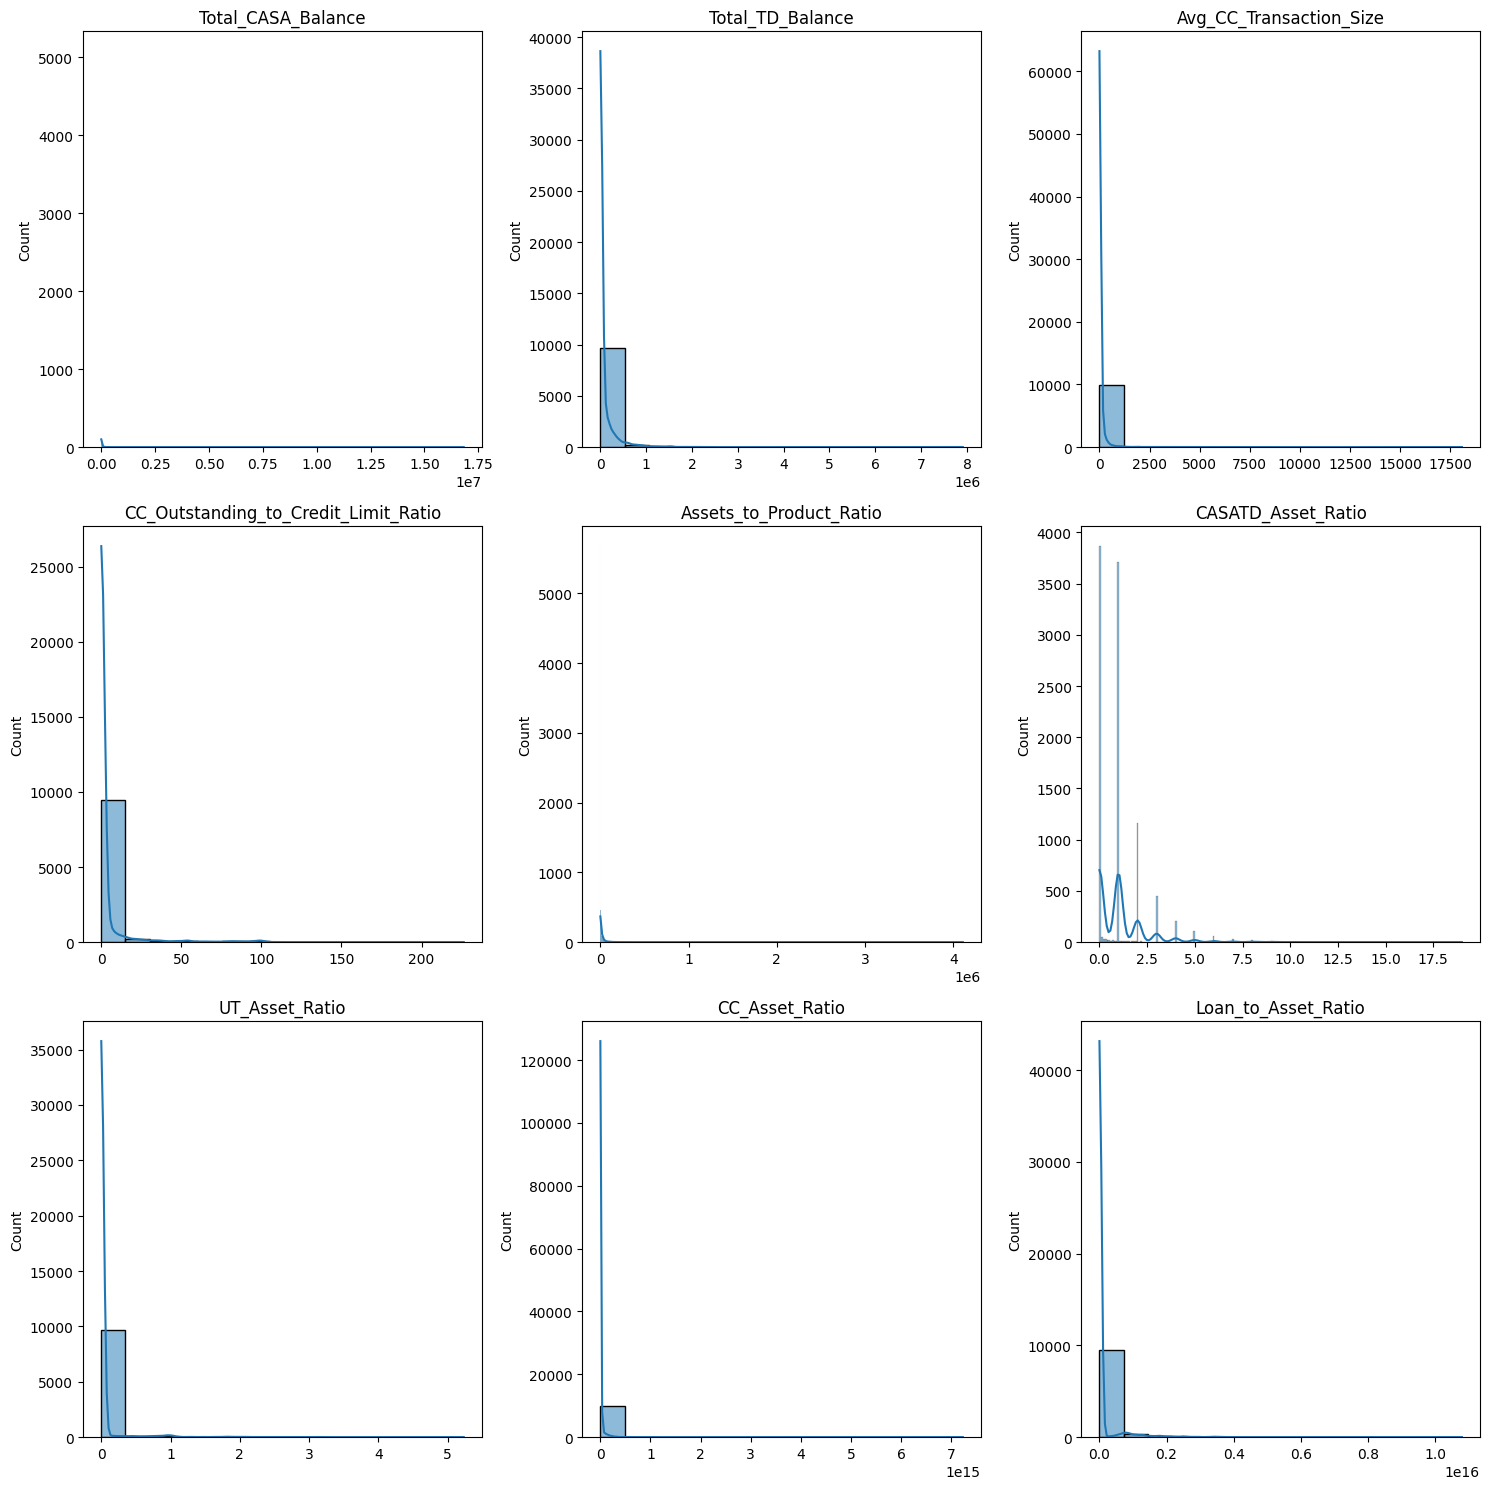

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler

column_list= ['Total_CASA_Balance','Total_TD_Balance','Avg_CC_Transaction_Size','CC_Outstanding_to_Credit_Limit_Ratio','Assets_to_Product_Ratio','CASATD_Asset_Ratio','UT_Asset_Ratio','CC_Asset_Ratio','Loan_to_Asset_Ratio']

#  Creating a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Sample size for plotting (adjust as needed)
sample_size = 10000
# Flatten the axes array for easier iteration
axes = axes.flatten()

# RobustScaler to handle outliers
scaler = RobustScaler()

# Loop through each column name and plot its density plot
for i, column in enumerate(column_list):
    # Select the current axis
    ax = axes[i]
    
    # Sample data for the current column
    sampled_data = df[column].sample(n=sample_size, random_state=42)
    
    # Apply log transformation to handle skewness
    sampled_data_transformed = np.log1p(sampled_data)  # Example transformation

    # Standardize the transformed data using RobustScaler
    standardized_data = scaler.fit_transform(sampled_data_transformed.values.reshape(-1, 1)).flatten()
    
    # Plot density plot for the sampled data
    sns.histplot(sampled_data, kde=True, ax=ax)
    
    # Set title for the plot
    ax.set_title(column)
    
    # Remove xlabel for better visualization
    ax.set_xlabel('')
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

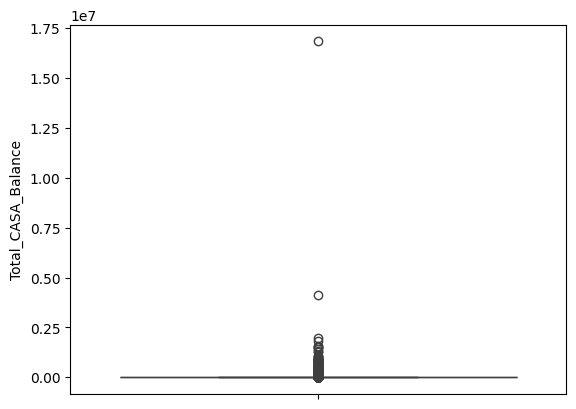

In [13]:
# df['Total_CASA_Balance']

sampled_data = df['Total_CASA_Balance'].sample(n=sample_size, random_state=42)

# Plot density plot for the sampled data
sns.boxplot(sampled_data)
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from data_prep import data_processing

# Load the dataset
filename = 'assessment.xlsx'
sheetname = 'Data'
data = data_processing(filename,sheetname)

# Select relevant features for each product type
casa_features = ['Total_CASA_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded']
td_features = ['Total_TD_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded']
funds_features = ['IS_FUNDS', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded']
equity_features = ['IS_equity', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded']

product_features = {
    'CASA': ['Total_CASA_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'TD': ['Total_TD_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded','NUM_PRD'],
    'CC': ['Avg_CC_Transaction_Size', 'CC_Outstanding_to_Credit_Limit_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded','NUM_PRD'],
    'LOAN': ['IS_LOAN', 'Loan_to_Asset_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded','NUM_PRD'],
    'FUNDS': ['IS_FUNDS', 'Assets_to_Product_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded','NUM_PRD']
}

# Normalize the data
scaler = StandardScaler()
casa_data = scaler.fit_transform(data[casa_features])
td_data = scaler.fit_transform(data[td_features])
funds_data = scaler.fit_transform(data[funds_features])
equity_data = scaler.fit_transform(data[equity_features])

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
casa_pca = pca.fit_transform(casa_data)
td_pca = pca.fit_transform(td_data)
funds_pca = pca.fit_transform(funds_data)
equity_pca = pca.fit_transform(equity_data)

# Clustering using KMeans
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

casa_clusters = perform_clustering(casa_pca, n_clusters=3)
td_clusters = perform_clustering(td_pca, n_clusters=3)
funds_clusters = perform_clustering(funds_pca, n_clusters=3)
equity_clusters = perform_clustering(equity_pca, n_clusters=3)

# Visualize Clusters
def visualize_clusters(data, clusters, title):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

visualize_clusters(casa_pca, casa_clusters, 'Clustering for CASA Product')
visualize_clusters(td_pca, td_clusters, 'Clustering for TD Product')
visualize_clusters(funds_pca, funds_clusters, 'Clustering for Funds Product')
visualize_clusters(equity_pca, equity_clusters, 'Clustering for Equity Product')


0         55168
1        672282
2          5420
3         13596
4        103278
          ...  
66078         0
66079         0
66080         0
66081         0
66082      1417
Name: Total_CASA_Balance, Length: 66083, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
filename = 'assessment.xlsx'
sheetname = 'Data'
data = data_processing(filename,sheetname)

#remove NaN values from Total_CASA_Balance
data = data.dropna(subset=['Total_CASA_Balance'])

/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nshukla/miniconda3/envs/py310/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode

# Define product types
products = ['CASA', 'TD', 'CC', 'LOAN', 'FUNDS']

# Iterate over each product type
for product in products:
    # Filter data for the current product
    product_data = data[data[f'IS_{product}'] == 1]
    
    # Select relevant features
    features = ['Total_CASA_Balance', 'Total_TD_Balance', 'Avg_CC_Transaction_Size',
                'Loan_to_Asset_Ratio', 'Assets_to_Product_Ratio']  # Add more features as needed
    
    # Standardize the features
    # scaler = StandardScaler()
    # scaled_features = scaler.fit_transform(product_data[features])
    
    # Dimensionality Reduction using PCA
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(scaled_features)
    
    # Clustering using KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(reduced_features)

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)

    # Identify affluent clusters
    affluent_cluster = mode(clusters[product_data['C_seg'] == 0])[0]

    # Find customers with similar profiles in the Normal segment
    similar_customers = product_data[(clusters == affluent_cluster) & (product_data['C_seg'] == 1)]

    # Print recommendations
    print(f"Recommendations for {product}:")
    print("Identified affluent cluster(s):", affluent_cluster)
    print("Customers with similar profiles in the Normal segment:")
    print(similar_customers)
    print("-----------------------------------------------\n")


ValueError: could not convert string to float: 'Total_CASA_Balance'

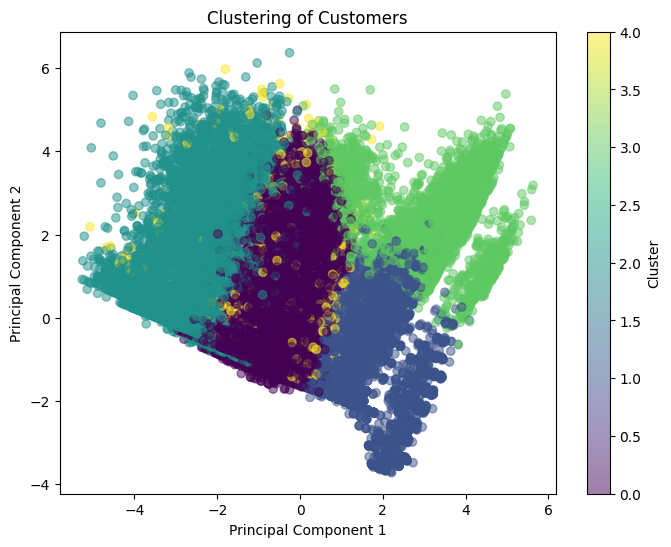

Groups with similar statistics to affluent cluster:
[0, 1, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 30, 31, 33, 34, 37, 43, 45, 48, 50, 53, 54, 55, 56, 59, 63, 65, 67, 68, 69, 70, 72, 74, 76, 77, 78, 81, 82, 87, 88, 89, 93, 94, 95, 98, 99, 100, 102, 106, 110, 112, 115, 116, 118, 119, 122, 123, 124, 134, 135, 137, 138, 139, 140, 146, 147, 149, 155, 157, 162, 167, 168, 175, 177, 178, 179, 180, 183, 184, 185, 186, 190, 191, 192, 193, 195, 196, 203, 204, 209, 210, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 227, 228, 230, 231, 234, 236, 238, 241, 243, 244, 245, 246, 248, 249, 250, 251, 253, 255, 256, 257, 259, 262, 263, 266, 268, 269, 270, 271, 275, 276, 281, 286, 288, 291, 294, 295, 297, 299, 303, 306, 308, 310, 312, 314, 315, 316, 317, 319, 320, 327, 328, 329, 330, 331, 334, 335, 336, 337, 338, 340, 346, 349, 351, 353, 354, 355, 356, 358, 359, 361, 362, 364, 367, 369, 370, 371, 372, 374, 376, 377, 378, 379, 380, 381, 384, 385, 386, 389, 390, 396, 397, 398, 399, 400, 401, 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['IS_CASA', 'IS_TD', 'IS_CC', 'IS_LOAN', 'IS_FUNDS', 'Age_Group', 'C_EDU_Encoded',
            'C_HSE_Encoded', 'C_OCC_Encoded', 'Total_CASA_Balance', 'Total_TD_Balance',
            'Avg_CC_Transaction_Size', 'Loan_to_Asset_Ratio', 'Assets_to_Product_Ratio','CASATD_Asset_Ratio', 'UT_Asset_Ratio', 'CC_Asset_Ratio', 'NUM_PRD']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Print cumulative explained variance ratio
print("Cumulative Explained Variance Ratio:")
print(np.cumsum(pca.explained_variance_ratio_))
print("-" * 50)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Identify affluent-like groups
affluent_cluster = np.argmax(np.bincount(clusters[data['C_seg'] == 0])) #Affluent segment
similar_groups = [i for i, cluster in enumerate(clusters) if np.isclose(cluster, affluent_cluster)]

# Print similar groups
print("Groups with similar statistics to affluent cluster:")
print(similar_groups)

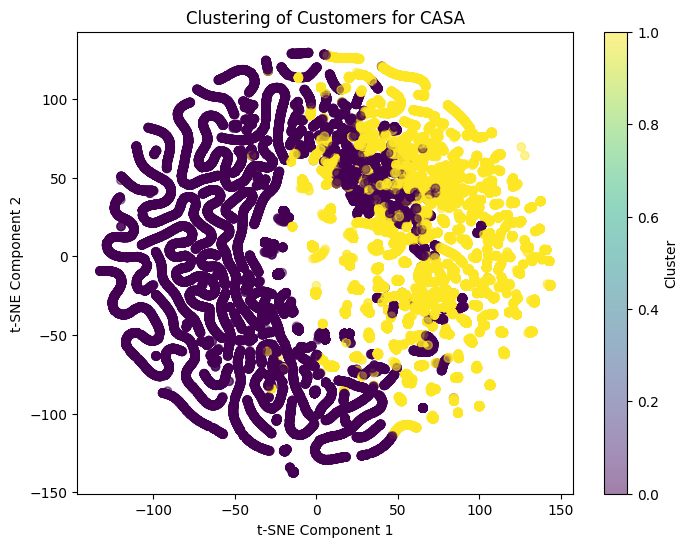

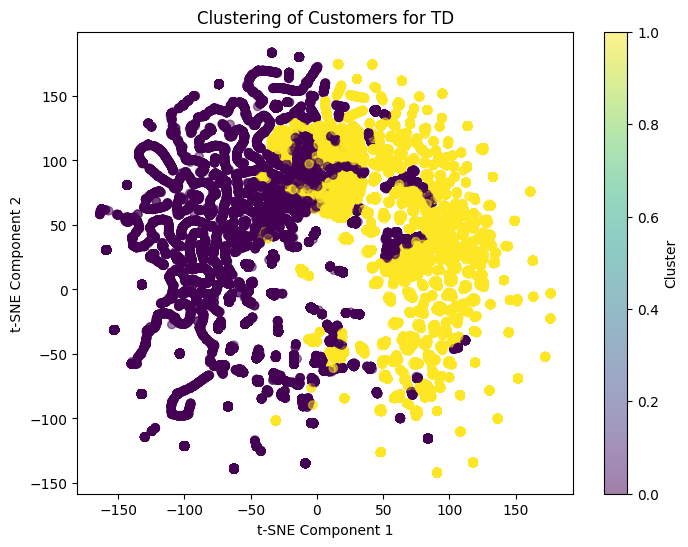

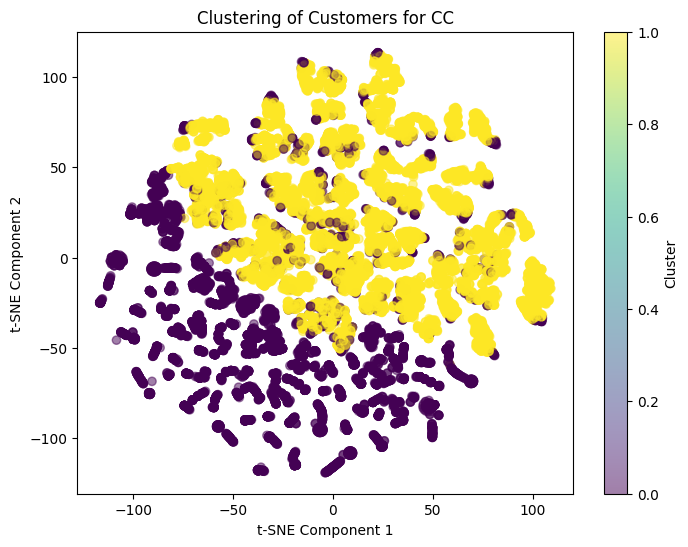

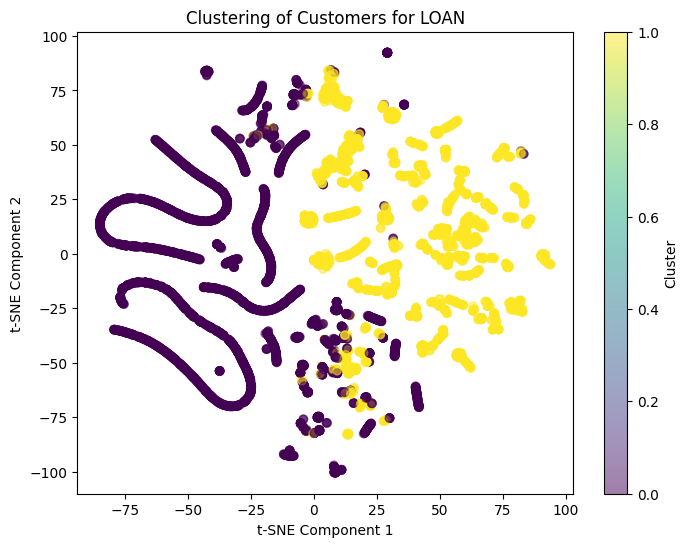

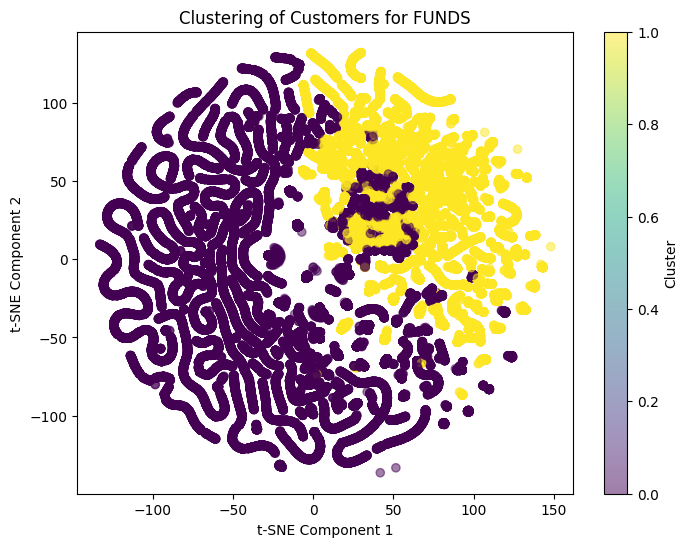

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# Load the dataset

# Define product features
product_features = {
    'CASA': ['Total_CASA_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'TD': ['Total_TD_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'CC': ['Avg_CC_Transaction_Size', 'CC_Outstanding_to_Credit_Limit_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'LOAN': ['IS_LOAN', 'Loan_to_Asset_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'FUNDS': ['IS_FUNDS', 'Assets_to_Product_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD']
}

# Perform clustering for each product
for product, features in product_features.items():
    # Separate data for the current product
    product_data = data[data[f'IS_{product}'] == 1]
    
    # Select relevant features
    selected_features = features
    
    # Handle missing values and encode categorical variables if needed
    
    # Standardize the features
    scaler = StandardScaler()
    product_data_scaled = scaler.fit_transform(product_data[selected_features])
    
    # Apply PCA for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    product_data_tsne = tsne.fit_transform(product_data_scaled)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters for visualization (affluent vs normal)
    clusters = kmeans.fit_predict(product_data_scaled)
    
    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(product_data_tsne[:, 0], product_data_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title(f'Clustering of Customers for {product}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


Product: CASA
Classification Report on Test Set (Affluent Customers):
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      2173
           1       0.79      0.75      0.77      2197

    accuracy                           0.78      4370
   macro avg       0.78      0.78      0.78      4370
weighted avg       0.78      0.78      0.78      4370



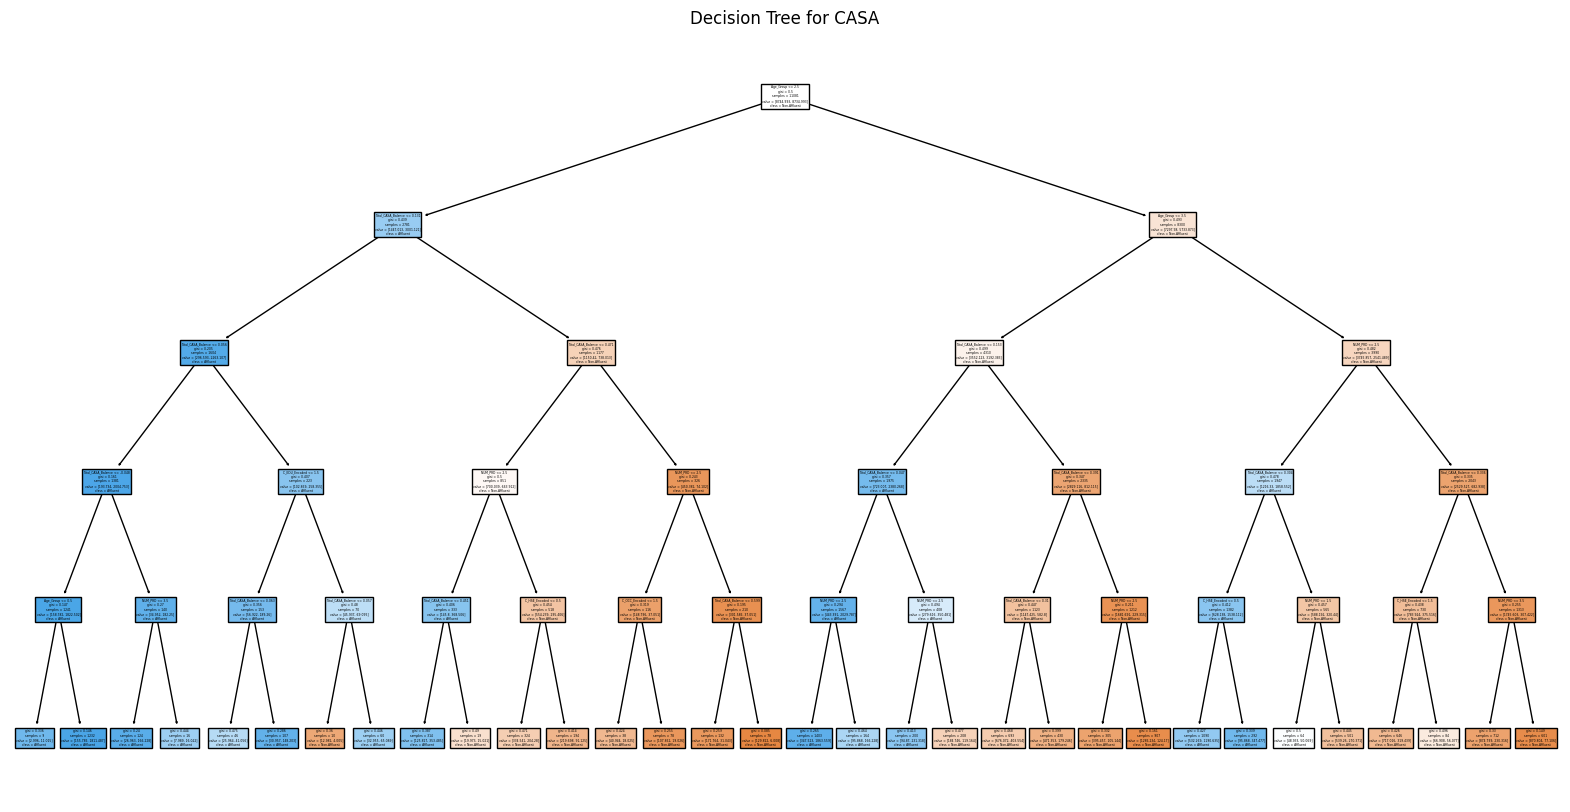

Potential Candidates for Upclassing:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
10927   1186      1        1         1      0        0          3   
10928   1353      1        1         1      0        0          4   
10929   1563      1        1         1      0        0          4   
10932   1748      1        1         1      1        0          3   
10940   1917      1        1         1      0        0          4   
...      ...    ...      ...       ...    ...      ...        ...   
66064  22321      1        1         1      0        0          2   
66065  22322      1        1         1      0        0          2   
66066  22323      1        1         1      0        0          3   
66069  22353      1        1         1      0        0          4   
66075  22496      1        1         1      0        0          4   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0          

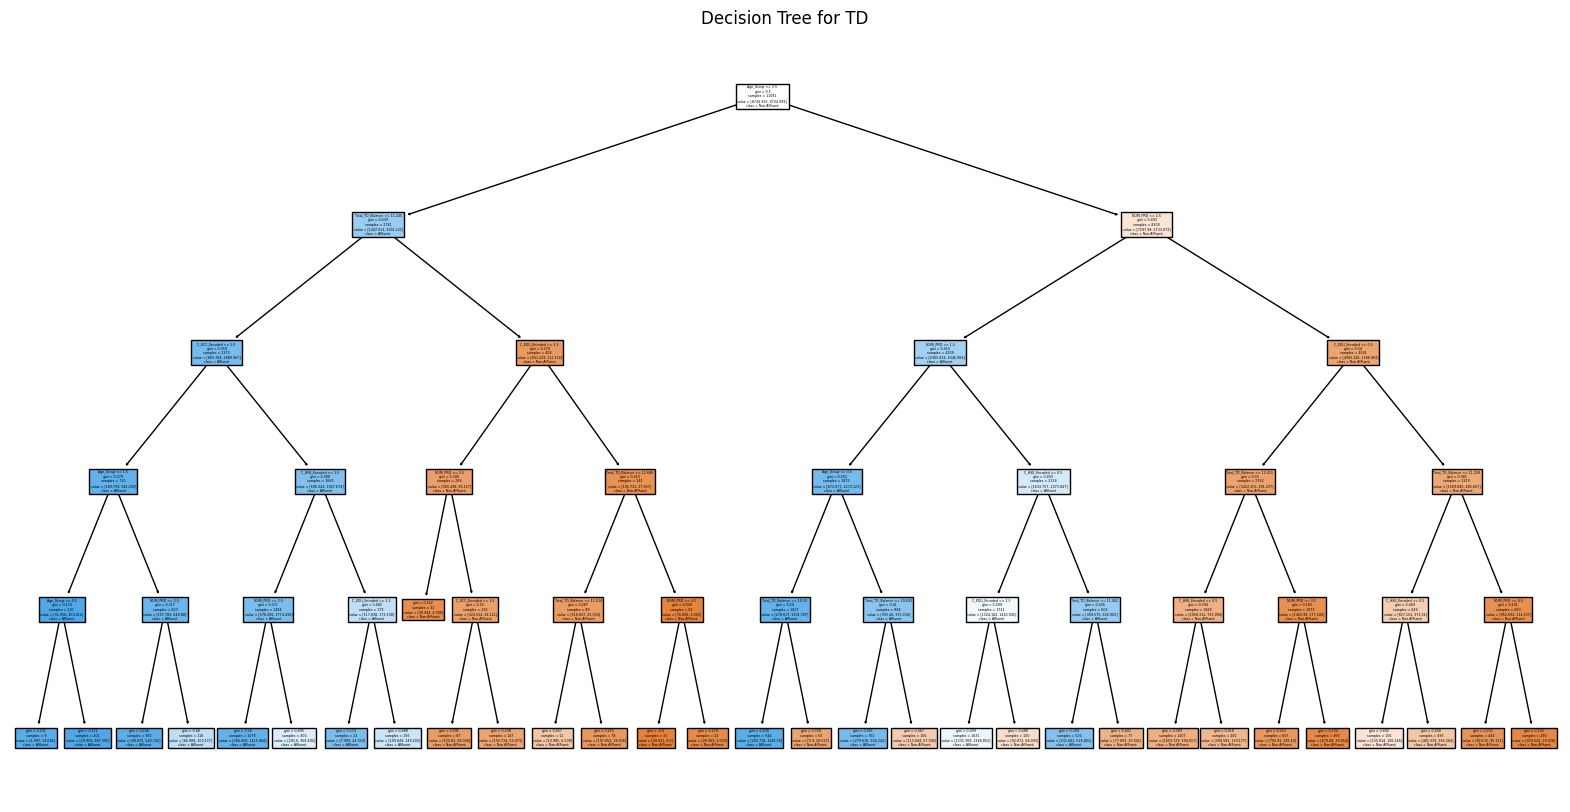

Potential Candidates for Upclassing:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
10927   1186      1        1         1      0        0          3   
10928   1353      1        1         1      0        0          4   
10932   1748      1        1         1      1        0          3   
10940   1917      1        1         1      0        0          4   
10941   1931      1        1         1      0        0          4   
...      ...    ...      ...       ...    ...      ...        ...   
66053  22181      1        1         1      0        0          2   
66061  22264      1        1         1      0        0          2   
66064  22321      1        1         1      0        0          2   
66066  22323      1        1         1      0        0          3   
66069  22353      1        1         1      0        0          4   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0          

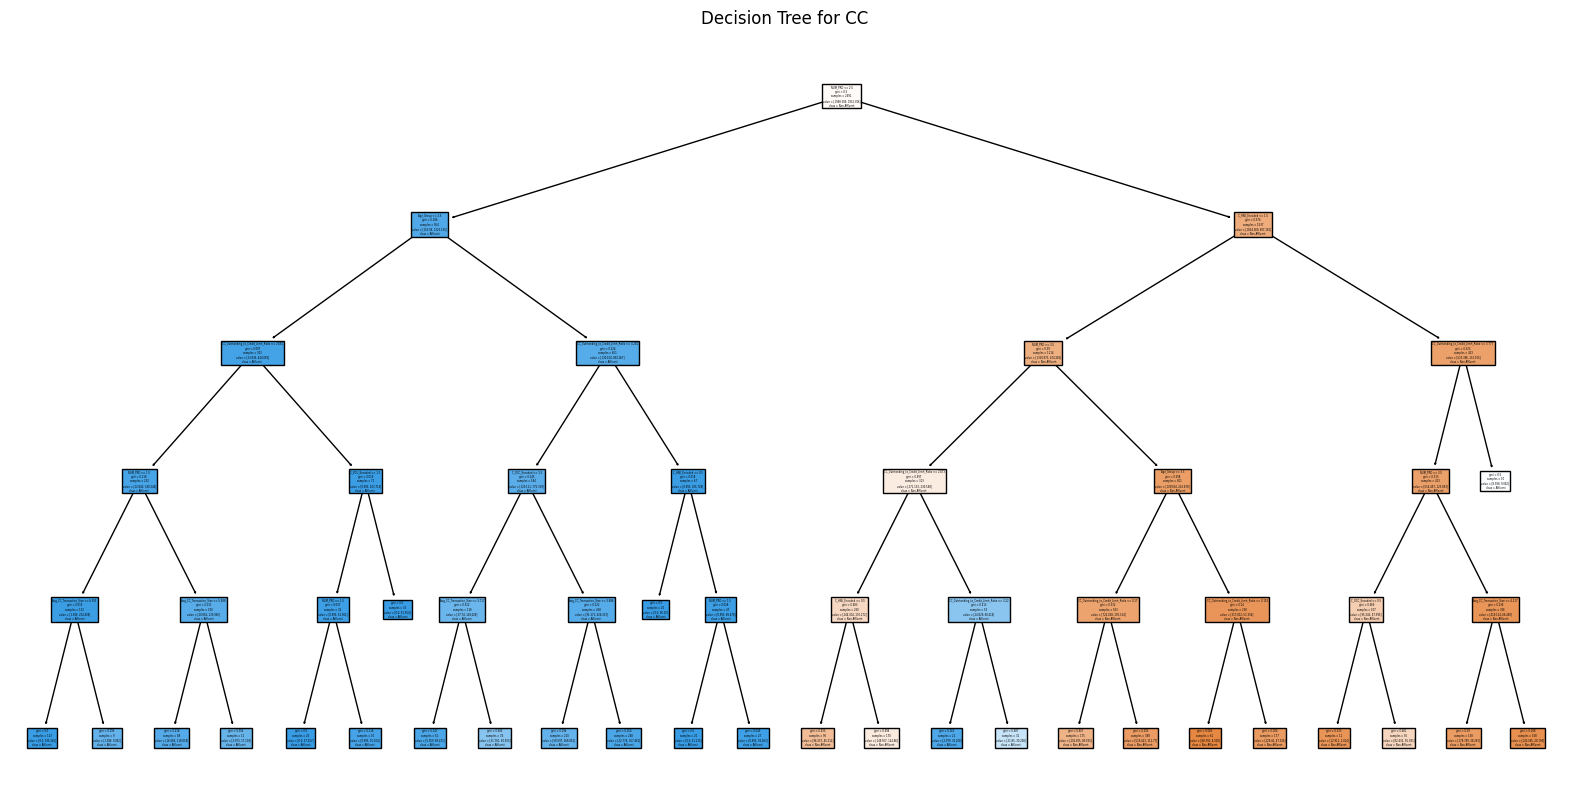

Potential Candidates for Upclassing:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
10927   1186      1        1         1      0        0          3   
10932   1748      1        1         1      1        0          3   
10940   1917      1        1         1      0        0          4   
10941   1931      1        1         1      0        0          4   
10946   2039      1        1         1      0        0          4   
...      ...    ...      ...       ...    ...      ...        ...   
66053  22181      1        1         1      0        0          2   
66064  22321      1        1         1      0        0          2   
66065  22322      1        1         1      0        0          2   
66066  22323      1        1         1      0        0          3   
66069  22353      1        1         1      0        0          4   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0          

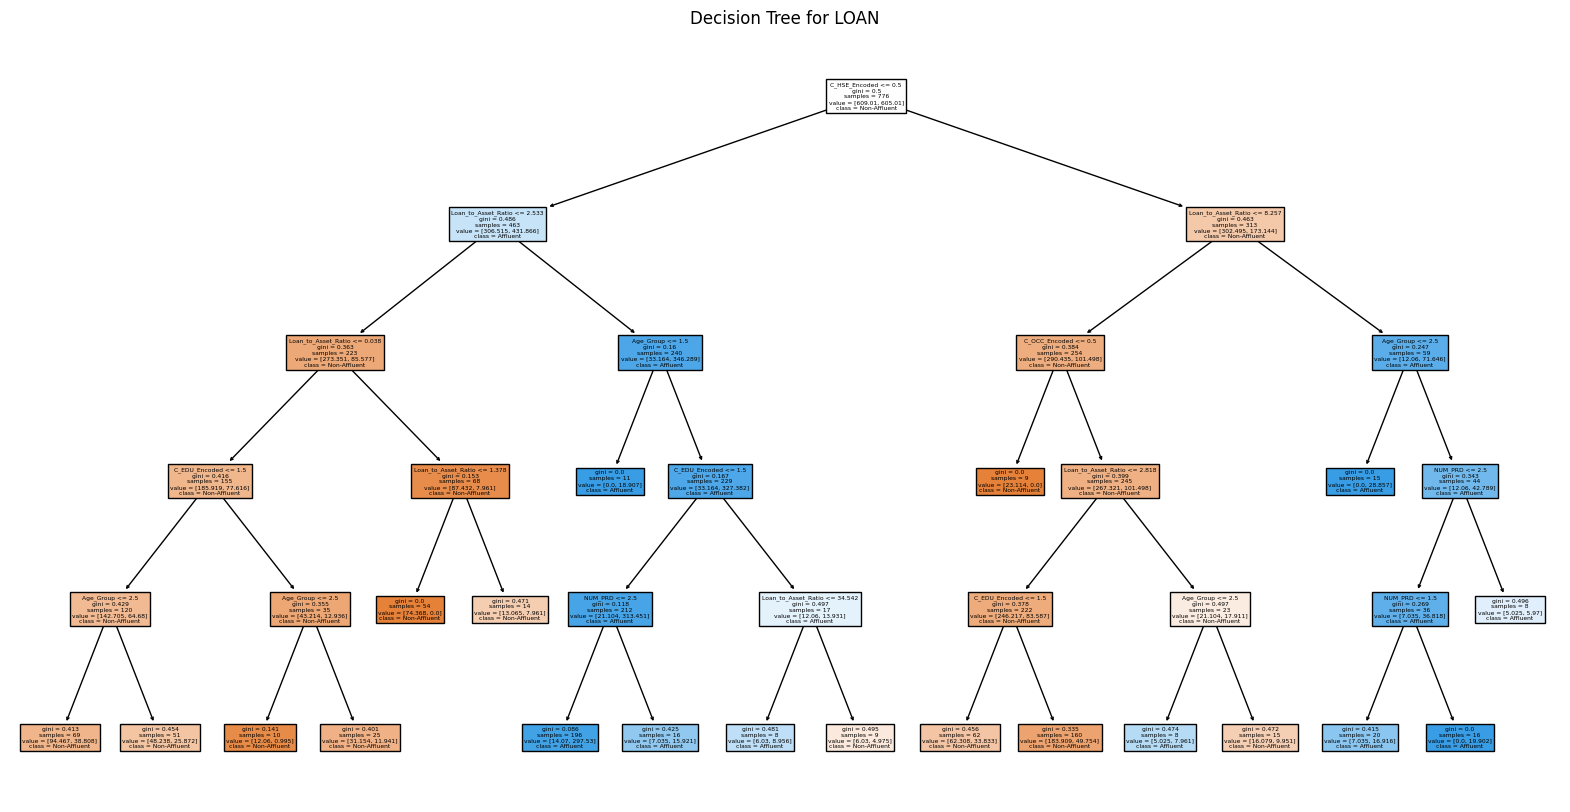

Potential Candidates for Upclassing:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
10927   1186      1        1         1      0        0          3   
10928   1353      1        1         1      0        0          4   
10931   1722      1        1         1      0        0          4   
10932   1748      1        1         1      1        0          3   
10933   1751      1        1         1      0        0          2   
...      ...    ...      ...       ...    ...      ...        ...   
66072  22404      1        1         1      0        0          2   
66073  22417      1        1         1      0        0          2   
66075  22496      1        1         1      0        0          4   
66077  22503      1        1         1      0        0          2   
66082  22584      1        1         1      0        0          2   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0          

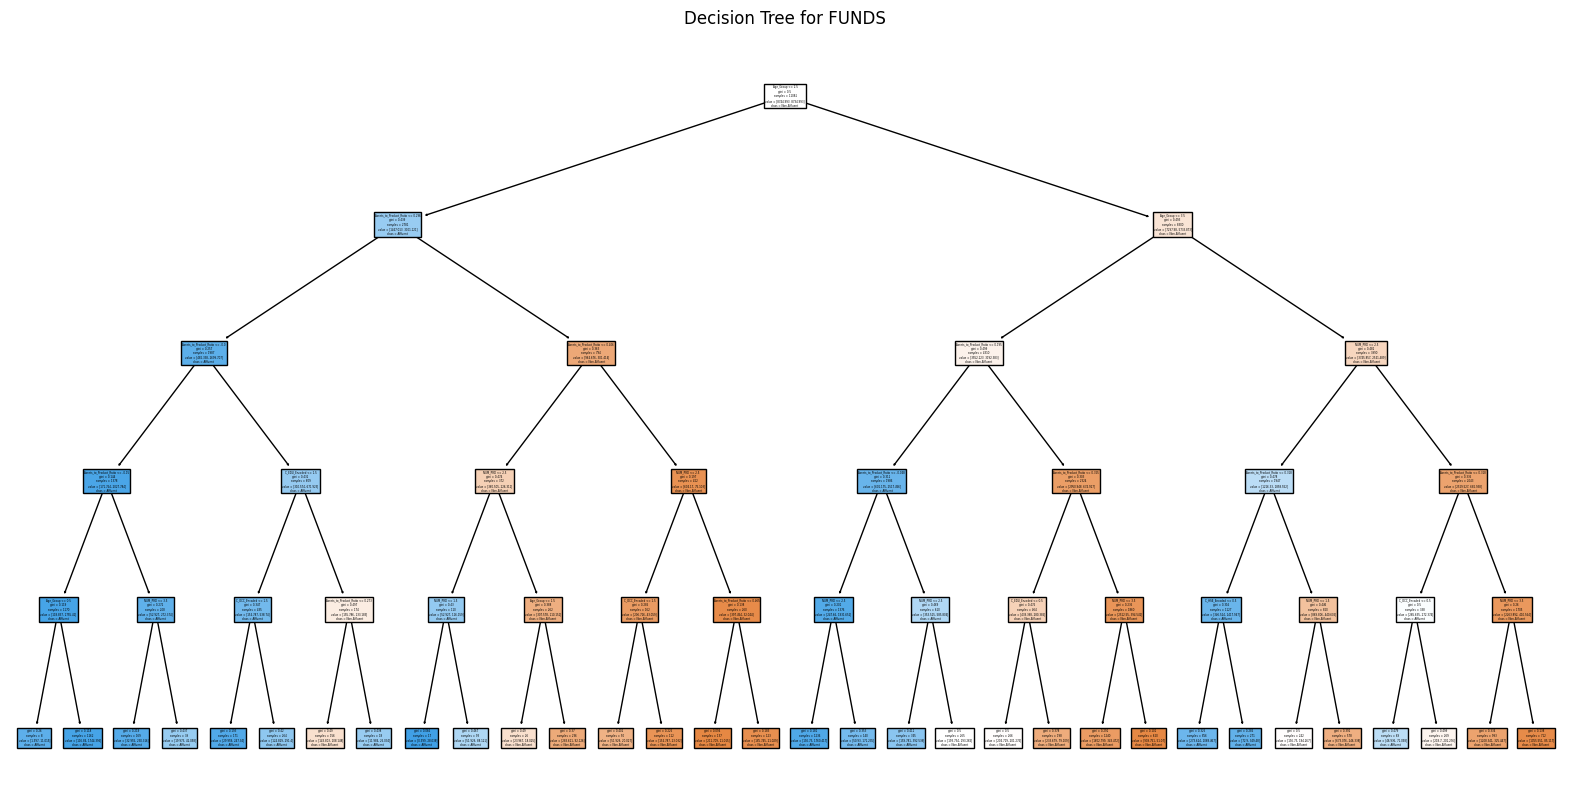

Potential Candidates for Upclassing:
        C_ID  IS_TD  IS_CASA  IS_FUNDS  IS_CC  IS_LOAN  Age_Group  \
10927   1186      1        1         1      0        0          3   
10928   1353      1        1         1      0        0          4   
10929   1563      1        1         1      0        0          4   
10932   1748      1        1         1      1        0          3   
10940   1917      1        1         1      0        0          4   
...      ...    ...      ...       ...    ...      ...        ...   
66061  22264      1        1         1      0        0          2   
66064  22321      1        1         1      0        0          2   
66066  22323      1        1         1      0        0          3   
66069  22353      1        1         1      0        0          4   
66075  22496      1        1         1      0        0          4   

       C_EDU_Encoded  C_HSE_Encoded  C_OCC_Encoded  Total_CASA_Balance  \
10927              0              0              0          

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset

# Define product features
product_features = {
    'CASA': ['Total_CASA_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'TD': ['Total_TD_Balance', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'CC': ['Avg_CC_Transaction_Size', 'CC_Outstanding_to_Credit_Limit_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'LOAN': ['Loan_to_Asset_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD'],
    'FUNDS': ['Assets_to_Product_Ratio', 'Age_Group', 'C_EDU_Encoded', 'C_HSE_Encoded', 'C_OCC_Encoded', 'NUM_PRD']
}

# Train tree-based classifier for each product
for product, features in product_features.items():
    print(f"Product: {product}")
    
    # Separate data for the current product
    product_data = data[data[f'IS_{product}'] == 1]
    
    # Select relevant features
    selected_features = features
    
    # Handle missing values and encode categorical variables if needed
    
    Affluent_data = product_data[product_data['C_seg']==0]
    Normal_data = product_data[product_data['C_seg']==1].sample(n=len(Affluent_data), random_state=42)

    #Create balanced product data
    product_data = pd.concat([Normal_data,Affluent_data])

    # Prepare data for modeling
    X = product_data[selected_features]
    y = product_data['C_seg']  # Target variable
    
    # Check if data is empty
    if len(X) == 0:
        print("No data available for modeling.")
        continue
    
    # # Split data into affluent and non-affluent customers
    # affluent_data = product_data[y == 0]
    # non_affluent_data = data[(data['C_seg'] == 1) & (data[f'IS_{product}'] == 0)]  
    non_affluent_data = data[(data['C_seg'] == 1)]  

    # Split affluent data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model on affluent customers with min leaf node and max depth
    clf = RandomForestClassifier(min_samples_leaf = 8,max_depth=5, class_weight='balanced' ,random_state=42)  # Using RandomForestClassifier with balanced class weights

    clf.fit(X_train, y_train)
    
    # Print classification report on test set
    print("Classification Report on Test Set (Affluent Customers):")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(clf.estimators_[0], feature_names=selected_features, class_names=['Non-Affluent', 'Affluent'], filled=True)
    plt.title(f'Decision Tree for {product}')
    plt.show()
    
    # Apply the model on non-affluent customers who do not have the product
    X_non_affluent = non_affluent_data[selected_features]
    y_non_affluent_pred = clf.predict(X_non_affluent)
    
    # Print potential candidates for upclassing
    potential_candidates = non_affluent_data[y_non_affluent_pred == 0]
    print("Potential Candidates for Upclassing:")
    print(potential_candidates)

    #update potential_candidates in the data create additional column for this product type
    data[f'Potential_{product}_Candidates'] = 0
    data.loc[potential_candidates.index, f'Potential_{product}_Candidates'] = 1
    print("-" * 50)


In [86]:
product_features = ['CASA', 'TD', 'CC' , 'LOAN', 'FUNDS']

data['Potential_Product_Candidates'] = data[[f'Potential_{product}_Candidates' for product in product_features]].sum(axis=1)
# sum of records where Potential_Product_Candidates > 0
count = data[data['Potential_Product_Candidates'] > 0].shape[0]
count

36660

In [69]:
product_data = data[data[f'IS_CC'] == 1]
print(len(product_data[product_data['C_seg']==0]))
print(len(product_data[product_data['C_seg']==1]))

#take random data with seed from product_data where C_seg=1 and length of records extracted is length of records where C_seg=0
Normal_data = product_data[product_data['C_seg']==1].sample(n=len(product_data[product_data['C_seg']==0]), random_state=42)
Affluent_data = product_data[product_data['C_seg']==0]

#provide union of both dataframes
product_data = pd.concat([Normal_data,Affluent_data])

2451
15550
2451
